## Bioinformatics for Biologists: Analysing and Interpreting Genomics Datasets- Week 1

### Week 1 target
* Introduction to the concept of environment variables and demonstrating the installation of key bioinformatics tools. 
* Introduction to next-generation sequencing, its significance and different file formats used. 
* Description of different steps in a next generation pipeline ranging from sequence quality control, mapping and variant calling. 
* How to run different commands on the UNIX command line for sequence quality control, mapping, and variant calling.

### Installation of Windows Subsystem for Linux to install the Ubuntu Distribution of Linux  
* Open PowerShell or Windows Command Prompt in **administrator** mode by right-clicking and selecting "Run as administrator"  
* **Enter the `wsl --install` command and restart your machine**  
* Once the process of installing your Linux distribution with WSL is complete, open the distribution (Ubuntu by default) using the **Start** menu. You will be asked to create a **User Name** and **Password** for your Linux distribution.  
Once you create a User Name and Password, the account will be your default user for the distribution and automatically sign-in on launch.  

### Installation of Miniconda on Ubuntu using CLI  
* Open your **terminal** and type `wsl -l -v` to check if the Ubuntu distribution is active. If not then enter command `wsl -d ubuntu` to activate it.  
  
* **Install miniconda using this command-**  
`wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh`  
* **After installation is completed, run it using this command-**  
`bash Miniconda3-latest-Linux-x86_64.sh`  
* **Accept the License Terms after reading them by typing "yes" when prompted**  
* **Choose Installation Location** - Default location is your home directory. Specify a different location according to your preference.  
* **Verify installation**  - To verify that Miniconda has been installed correctly, run the following commands- `conda --version` and `conda list`  
If installation is successful, you should be able to see a list of installed packages.  
If the command cannot be found, you can add the Anaconda bin to the path using the following command:  
`export PATH=~/miniconda3/bin:$PATH`  

To import the conda environment, type in the commands-
`conda env create -n MOOC --file MOOC.yml` after [installing](https://www.futurelearn.com/links/f/9shs5409fm00sshumwoz2jijpxedtm7) the file MOOC.yml into your computer and then type `conda activate MOOC` to activate the environment.




### Analysis and Interpretation Pipeline and different file formats for each step
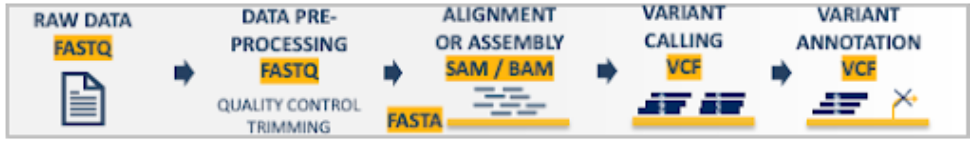

### Course Dataset
The dataset used in the course is described [here](https://github.com/CDCgov/datasets-sars-cov-2).    
In Week 1, analysis of one sample from the Variants of Interest/Variants of Concern (VOI/VOC) is done.  
**Steps to download sequence data-**  
* Download the SRA toolkit using the command-  
`sudo apt install sra-toolkit`
* The sequence data can then be downloaded using the command-  
`fastq-dump --split-files ERR5743893`

The Wuhan-1 reference sequence, which will be used use while mapping the sequence data for ERR5743893, is attached in a file named, [MN908947.fa](https://www.futurelearn.com/links/f/no858mqqw7cxpdgv3ko0eqohoo2p7qc)


#### Output
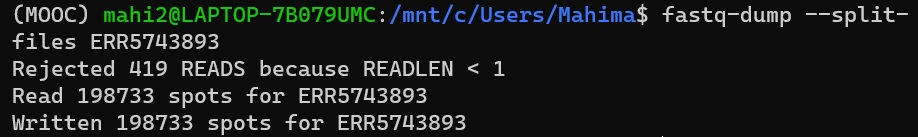

#### Interpretation with the help of a comment posted by- @[Arhouna Siguina TRAORE](https://www.futurelearn.com/profiles/18498770}) 
The output messages are related to the use of the fastq-dump command, which is a tool typically used to download FASTQ files from NCBI's Sequence Read Archive (SRA) database. Here's what these messages mean:

* **"Rejected 419 READS because READLEN < 1"**: This means that 419 reads were rejected because their length (READLEN) was less than 1. In other words, there were reads whose length was either unknown or equal to zero, which is unusual.  
* **"Read 198,733 points for ERR5743893"**: This indicates that the fastq-dump tool read a total of 198,733 points (or spots) for sample "ERR5743893". These points correspond to readings extracted from the SRA database.  
* **"Written 198,733 points for ERR5743893"**: This means that the tool has written 198,733 points in FASTQ format for sample "ERR5743893". These points are now available as FASTQ files for further analysis.  
To conclude, fastq-dump has successfully extracted the data for the sample "ERR5743893" from the SRA database, although a few reads were rejected due to length issues. The extracted data can now be used for further analysis.


**The most common raw data output from Next-Generation Sequencing (NGS) platforms is the FASTQ file, which is a text-based format.** 
  
**PacBio produces the [basecall File Format (bas.h5/bax.h5)](https://www.futurelearn.com/courses/bioinformatics-for-biologists-analysing-and-interpreting-genomics-datasets/1/steps/1813191)**  
  
**Illumina Sequencing systems like NextSeq, HiSeq, and NovaSeq 6000 generate raw data files in [binary base call (BCL) format](https://www.futurelearn.com/courses/bioinformatics-for-biologists-analysing-and-interpreting-genomics-datasets/1/steps/1813191) which can be converted to FASTQ using the bcl2fastq Conversion tool.**
  
**FASTQC file format:**  
* Line 1: Read sequence identifier/ label
* Line 2: Read sequence
* Line 3: a '+' sign (optional '+' followed by sequence identifier)
* Line 4: Quality score associated to each read as a string of ASCII characters
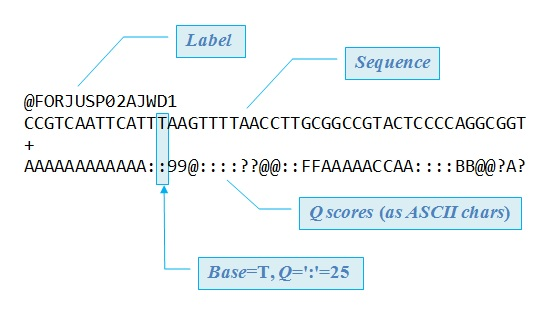

### Running FASTQC on target sample  
* First, let’s create a directory to save our fastQC outputs using the following command: `mkdir -p QC_Reports`
* Download fastqc using command: `sudo apt install fastqc`
* Now, run FASTQC on the two FASTQC files we downloaded in the previous section (remember to activate the MOOC environment if you haven’t already) by running this command:  
`fastqc ERR5743893_1.fastq ERR5743893_2.fastq --outdir QC_Reports`  
### Output  
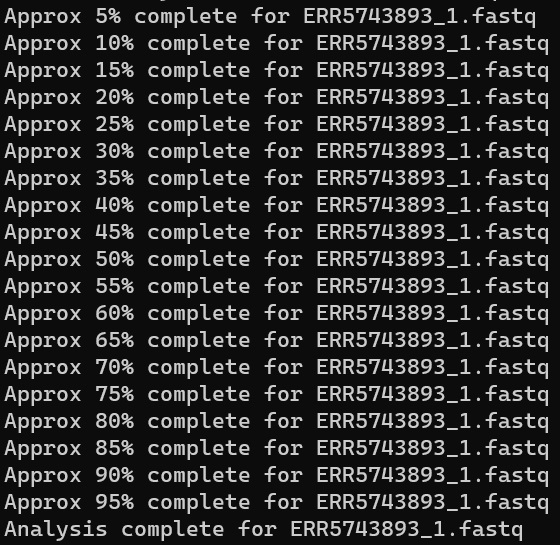  

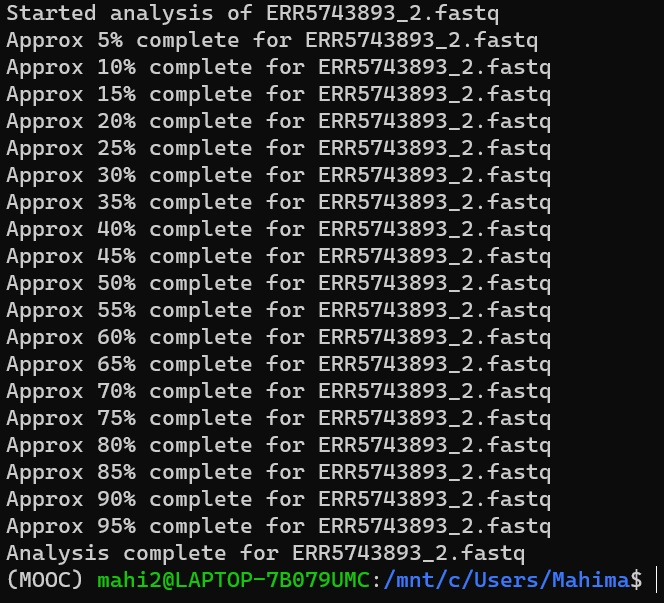  
* Once fastqc has finished running, change to the QC_reports directory using command `cd QC_Reports/` followed by the command `ls` to get this:

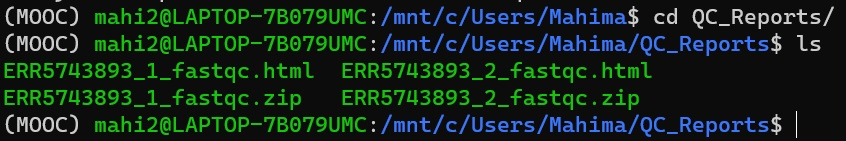  

The fastqc reports for the two files are as follows:  
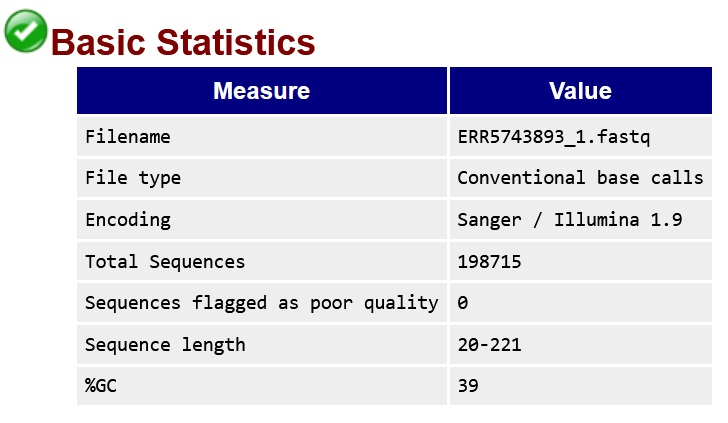 

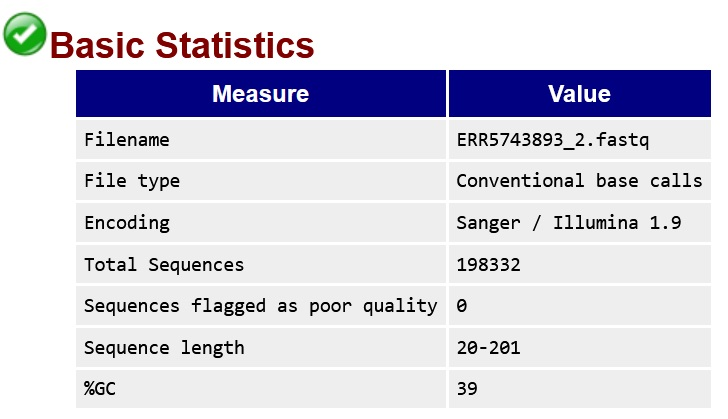

* In order to summarize the fastqc outputs of several fastqc files we can use a tool called **multiQC**
* To run **multiQC**, use the folowing commands:  
`sudo apt install multiqc`, followed by `multiqc .`  
* Now open the **multiqc_report.html** in a web browser, and explore the different outputs from the multiqc report.
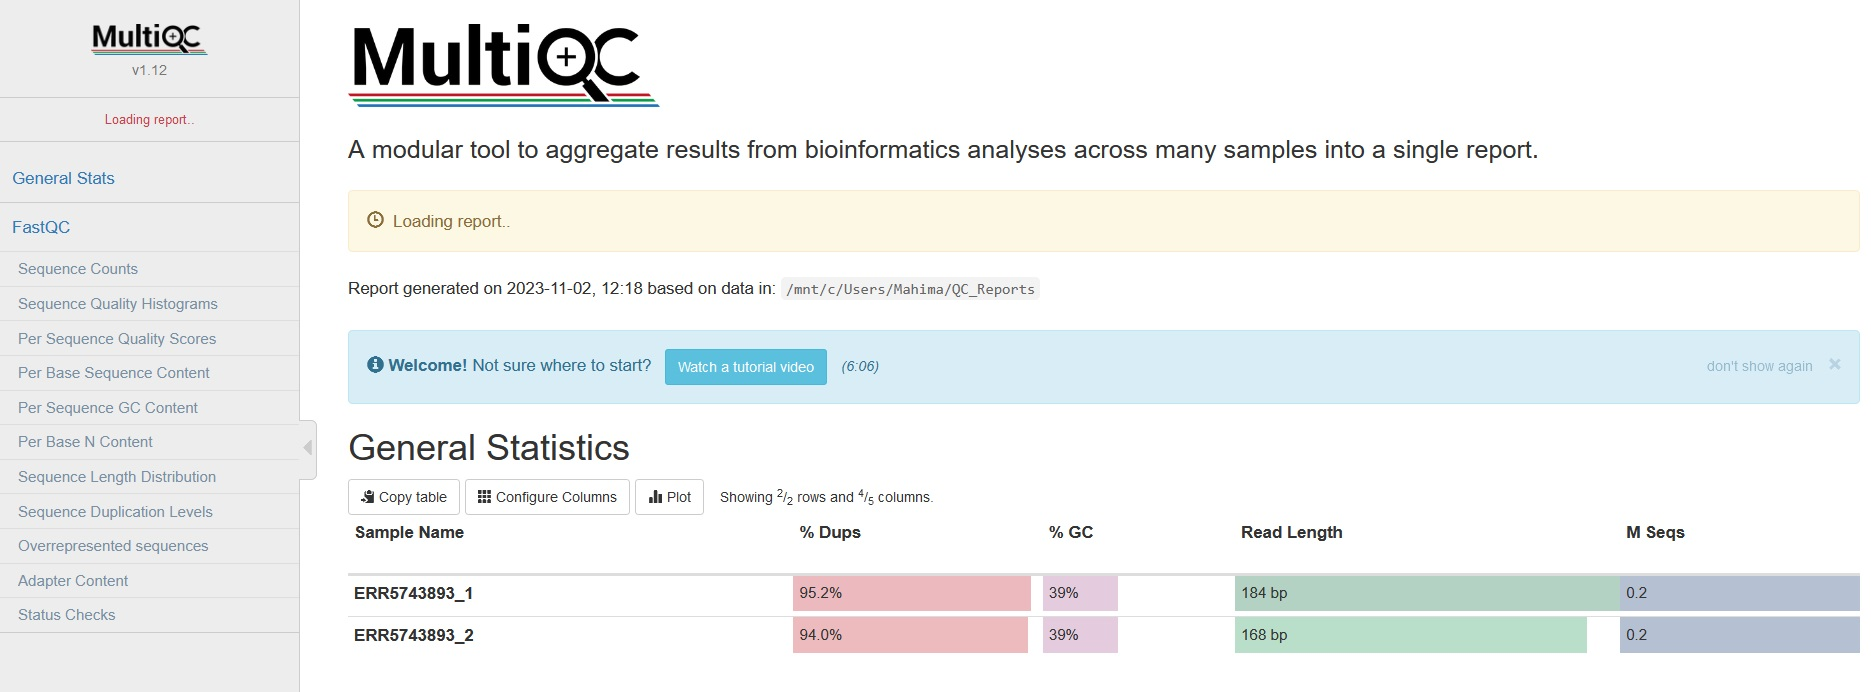  
Therefore, we observe that the general statistics from MultiQC are very close to that of FastQC.

### Mapping of the sample sequence  
This refers to the alignment of the sample sequences against the reference genome to determine the most likely source of the observed reads. The reference genome serves as a standard template for mapping. 
  
**Steps for the read mapping process involve:**  
* First the reference genome is prepared for alignment by performing **genome indexing**. This generates an index similar to a book index and enables mapping algorithms to search the genome and find matches with sequencing reads.
* Once the genome index has been created and the reads’ FASTQ files have been input, the **read mapping** process is carried out using specialised software such as **bwa** or **bowtie2**. This process produces alignments in the Sequence Alignment Map (SAM) or Binary Alignment Map (BAM) formats, the latter of which is a compressed binary format.
* The alignment reads are then **sorted** according to their genomic locations to ensure organised data and accelerate downstream processing.
* Finally, **BAM indexing** is done to establish an index for the alignment file, which is essential for later studies and visualisation software like the **Integrated Genome Viewer (IGV)**.  
The mapping result is a **SAM** format. The SAM file has a unified format for storing read alignments to a reference genome. 
  
**NOTE: CIGAR (Compact Idiosyncratic Gapped Alignment Report) string** offers a brief overview of the alignment's structure.  
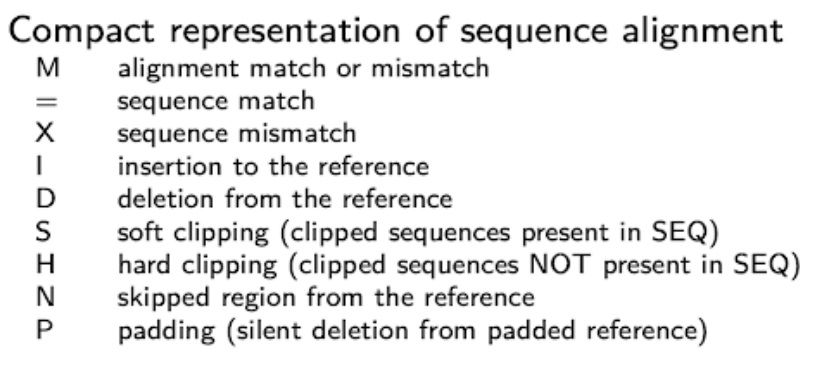


### Aligning the sequence data from the target sample to the Wuhan-1 reference genome along with the target sample fastq files  
We are going to use **BWA-MEM** to map sequences to the Wuhan-1 reference genome.  
  
**Steps:**  
* Create a directory to store the results from **BWA-MEM**:  
`mkdir Mapping`  
* Download the reference genome using the command:  
`wget https://www.ebi.ac.uk/ena/browser/api/fasta/MN908947.3?lineLimit=1000`  
and then rename the file to **'MN908947.fasta'**.  
* **Reference genome indexing**: to increase the effectiveness of data access and retrieval in dtaabases and computer systems. This is done using the commands: `sudo apt install bwa`, followed by, `bwa index MN908947.fasta`  

### Output
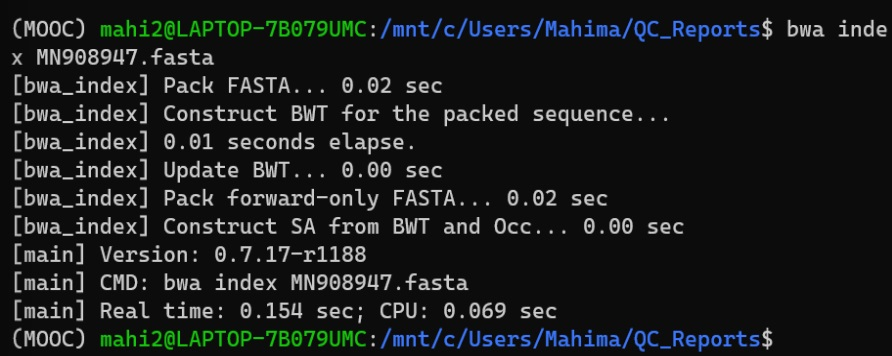  
* Now, we’re ready to map the sequences from our target sample to the reference genome using the command: `bwa mem MN908947.fasta ERR5743893_1.fastq ERR5743893_2.fastq > Mapping/ERR5743893.sam`

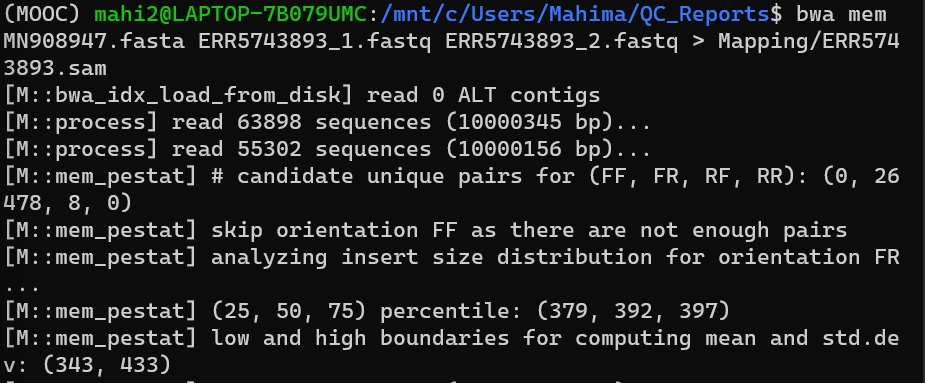  
* Once BWA MEM has finished running, change to the Mapping directory and list the files type in the commands: `cd Mapping`, followed by `ls =lhrt`  
**Output**  

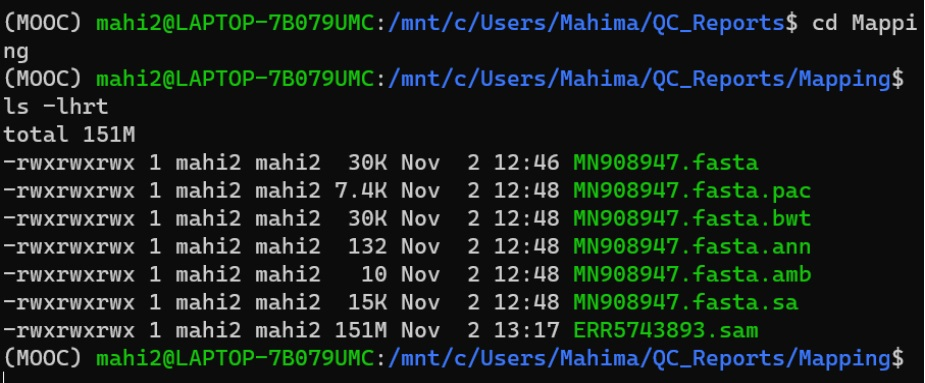  
* To save on space and speed up downstream analysis, we’re going to convert the SAM file to a BAM file using samtools (you’ll need to come out of the Mapping directory first) using command:  `cd ..`, followed by `sudo apt install samtools`, and then  
`samtools view -@ 20 -S -b Mapping/ERR5743893.sam > Mapping/ERR5743893.bam`  
        @ - number of threads  
S - input is a SAM file  
b - output should be a BAM file  

        


* **Sorting BAM file of reads and mapping information ordered:**  
`samtools sort -o Mapping/ERR5743893.sorted.bam Mapping/ERR5743893.bam`  
* **Indexing the sorted BAM file:**    
`samtools index Mapping/ERR5743893.sorted.bam`  
* **Now visualize your BAM file on Integrative Genomics Viewer**: IGV Link [here](https://www.futurelearn.com/links/l/da12l0spu3kk239w6rwkr3fykn7p1r0).  
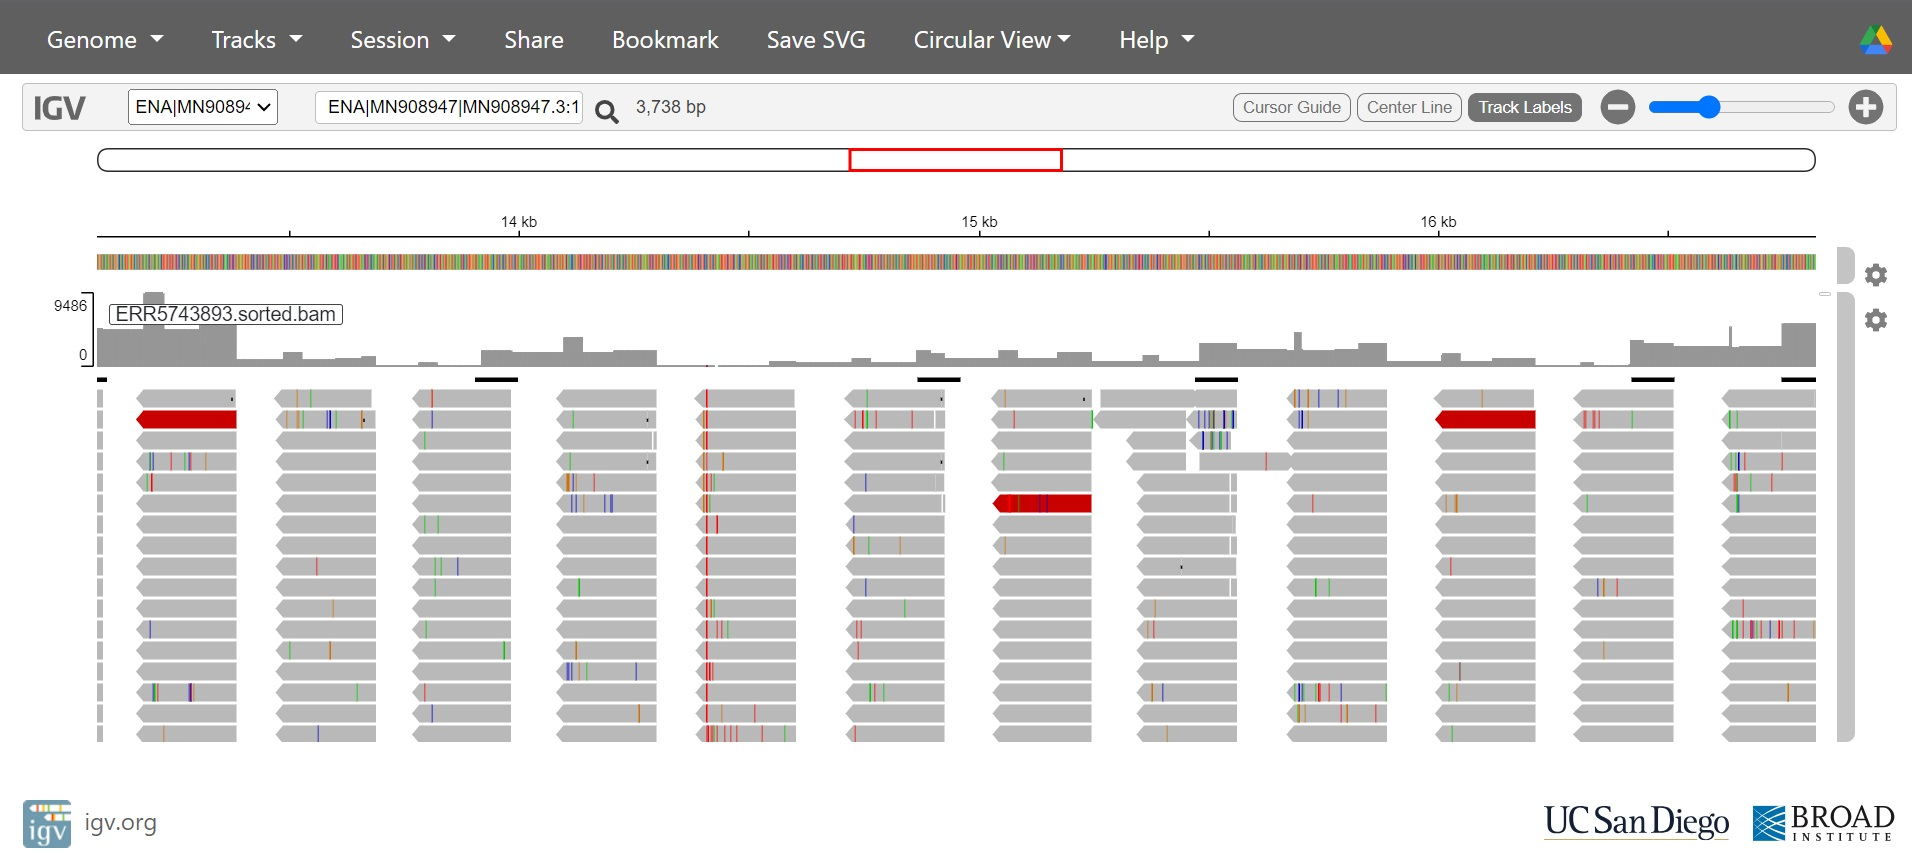


### Variant Calling
A variant refers to any change observed when comparing two sequences. Several types of variant exits each reflecting a different kind of alteration in the sequence. The process of identifying and characterising these variants is known as **variant calling**.  
Some examples include- **Insertions, Deletions, Indels, SNPs, MNPs, CNVs, Translocations, and Inversions.**  
  
  Several tools can be used for variant calling (**GATK, Samtools, Freebayes**).  
  One of the most common outputs of variant calling is the **variant call format (VCF)**. A VCF is a tab-delimited text, parsable by standard UNIX commands and can be compressed with BGZF (bgzip) and indexed with TBI or CSI (tabix).  
  False calls can arise due to various factors, including contamination during sample preparation, errors introduced during PCR amplification, sequencing errors, challenges in handling homopolymer runs, issues with mapping to repetitive sequences, and alignment errors. Additionally, false SNPs may be detected in the vicinity of indels, and ambiguous alignment of indels can further contribute to the presence of false variants.  
    
  **Here, we'll work with Freebayes to call variants from our BAM file**  
  * First we need to index the reference genome using samtools:   
  `samtools faidx MN908947.fasta`  
  followed by:  
  `sudo apt install freebayes`, and then:  
  `freebayes -f MN908947.fasta Mapping/ERR5743893.sorted.bam  > ERR5743893.vcf`  
  * Finally, it’s good practice to compress and index the VCF file so it takes up less space. This can be done the commands:  
  `sudo apt install tabix`, followed by `bgzip ERR5743893.vcf`, followed by `tabix ERR5743893.vcf.gz`   
    
   * You can open the vcf file in your terminal with the command `zcat ERR5743893.vcf`  
   * Install BCFTools with the command: `sudo apt install bcftools`  
   * To Identify the variants run the following command:  
   `bcftools query -f '%TYPE\n' ERR5743893.vcf.gz | sort | uniq -c`  
### Output
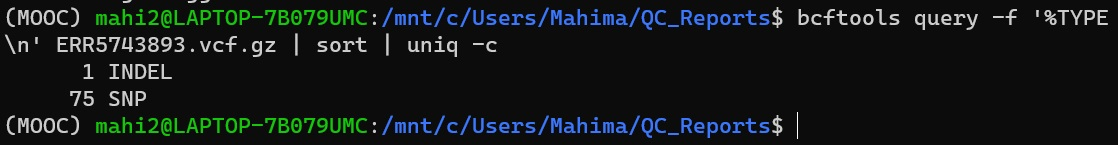



  